# Problem Statement

### A bike-sharing system is a service in which bikes are made available for shared use to individuals on a short term basis for a price or free. Many bike share systems allow people to borrow a bike from a "dock" which is usually computer-controlled wherein the user enters the payment information, and the system unlocks it. This bike can then be returned to another dock belonging to the same system.

### A US bike-sharing provider BoomBikes has recently suffered considerable dips in their revenues due to the ongoing Corona pandemic. The company is finding it very difficult to sustain in the current market scenario. So, it has decided to come up with a mindful business plan to be able to accelerate its revenue as soon as the ongoing lockdown comes to an end, and the economy restores to a healthy state. 

### In such an attempt, BoomBikes aspires to understand the demand for shared bikes among the people after this ongoing quarantine situation ends across the nation due to Covid-19. They have planned this to prepare themselves to cater to the people's needs once the situation gets better all around and stand out from other service providers and make huge profits.

### They have contracted a consulting company to understand the factors on which the demand for these shared bikes depends. Specifically, they want to understand the factors affecting the demand for these shared bikes in the American market. The company wants to know:

1.   Which variables are significant in predicting the demand for shared bikes.
2.   How well those variables describe the bike demands

### Based on various meteorological surveys and people's styles, the service provider firm has gathered a large dataset on daily bike demands across the American market based on some factors. 

In [988]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [989]:
## Importing Necessary Libraries 
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt
import datetime
import warnings
%matplotlib inline
warnings.filterwarnings("ignore")

# Data Overview

In [990]:
#Reading the Input Data
bike_data = pd.read_csv("/content/drive/MyDrive/BikeSharingAssignmentDataset/day.csv")


In [991]:
#Finding out bike_data Data Type which ideally should be a dataframe
type(bike_data)

pandas.core.frame.DataFrame

In [992]:
# Gives the Number of Columns & Number of Rows. We can see total 730 rows and 16 columns present in the given data
bike_data.shape

(730, 16)

In [993]:
#Gives a High Level View of Data - Name of Column , Data Type , Count of Non-Null, Row Entries Count, etc.
bike_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [994]:
#Describing Data - Gives Overall Stats Data Like Count, Mean , Min, Max , Medians , etc. for numberical columns
bike_data.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [995]:
#Viewing how the data looks like- 10 rows
bike_data.head(10)

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600
5,6,06-01-2018,1,0,1,0,4,1,1,8.378268,11.66045,51.8261,6.000868,88,1518,1606
6,7,07-01-2018,1,0,1,0,5,1,2,8.057402,10.44195,49.8696,11.304642,148,1362,1510
7,8,08-01-2018,1,0,1,0,6,0,2,6.765000,8.11270,53.5833,17.875868,68,891,959
8,9,09-01-2018,1,0,1,0,0,0,1,5.671653,5.80875,43.4167,24.250650,54,768,822
9,10,10-01-2018,1,0,1,0,1,1,1,6.184153,7.54440,48.2917,14.958889,41,1280,1321


## Data Summary

*   Data has 730 Rows and 16 Columns.
*   All columns are int/float data type and just one column is an object type  data type.
*   Some columns like weathersit, season, weekday all seem to be categorical and on further analysis we might think to convert them .
*   There are no missing values in any row or column.


# Data Quality Verification

In [996]:
# Creating a copy and checking duplicates. Dropping duplicates if any

bike_data_duplicates = bike_data.copy()

bike_data_duplicates.drop_duplicates(subset=None, inplace=True)

In [997]:
bike_data_duplicates.shape

(730, 16)

In [998]:
bike_data.shape

(730, 16)

In [999]:
# No Change in Data Shape for Both Dataframe. It means there are no duplicates.

In [1000]:
# Checking how the values in the column looks like as dataset is not too huge we can do this
# Excluding first column as readme.txt says it is record index and it will have unique values therefore.

bike_data_verification=bike_data.iloc[:,1:16]

In [1001]:
for col in bike_data_verification:
    print(bike_data_verification[col].value_counts(ascending=False), '\n')

01-01-2018    1
25-04-2019    1
27-04-2019    1
28-04-2019    1
29-04-2019    1
             ..
03-09-2018    1
04-09-2018    1
05-09-2018    1
06-09-2018    1
31-12-2019    1
Name: dteday, Length: 730, dtype: int64 

3    188
2    184
1    180
4    178
Name: season, dtype: int64 

0    365
1    365
Name: yr, dtype: int64 

1     62
3     62
5     62
7     62
8     62
10    62
12    62
4     60
6     60
9     60
11    60
2     56
Name: mnth, dtype: int64 

0    709
1     21
Name: holiday, dtype: int64 

6    105
0    105
1    105
2    104
4    104
5    104
3    103
Name: weekday, dtype: int64 

1    499
0    231
Name: workingday, dtype: int64 

1    463
2    246
3     21
Name: weathersit, dtype: int64 

26.035000    5
10.899153    5
27.880000    4
28.563347    4
23.130847    4
            ..
27.435847    1
26.376653    1
28.989419    1
28.700000    1
8.849153     1
Name: temp, Length: 498, dtype: int64 

32.73440    4
18.78105    3
31.85040    3
28.59875    2
23.32625    2
           .

#### Data Seems to have valid or expected data in the columns and hence we don't see any unusual record value.



# Removal of Unnecessary Data 

#### Which will not contribute much to the analysis.


### After reading the metadata file - Readme.txt and seeing the data
1.   It seems good to drop the instant column as it just has record index and it is not going to help us in any kind of analysis.
2.   casual & registered column can be removed as we would like to understand the model on cnt column which is anyway sum of casual & registered , so we can drop those 2 columns.
3.   We can may be also remove dteday column ,as we have 2 more columns yr , mnth which will anyway help us to identify the year and month.
4. We will create a new dataframe with above columns removed.



In [1002]:
bike_data.columns

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')

In [1003]:
bike_data_filtered = bike_data.drop(['instant', 'casual', 'registered','dteday'], axis=1)

In [1004]:
bike_data_filtered.columns

Index(['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday',
       'weathersit', 'temp', 'atemp', 'hum', 'windspeed', 'cnt'],
      dtype='object')

In [1005]:
bike_data_filtered.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    int64  
 1   yr          730 non-null    int64  
 2   mnth        730 non-null    int64  
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    int64  
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    int64  
 7   temp        730 non-null    float64
 8   atemp       730 non-null    float64
 9   hum         730 non-null    float64
 10  windspeed   730 non-null    float64
 11  cnt         730 non-null    int64  
dtypes: float64(4), int64(8)
memory usage: 68.6 KB


In [1006]:
# So we dropped 4 columns and 0 rows.

# Creating Dummy Variables

### Now we will see which variables we can categorise as category variables and create dummy variables for them.

### There are 4 such variables - weekday, weathersit, season, mnth which are categorical variables and dummy variables can be created for them.

### First we will convert their datatype to category

In [1007]:
bike_data_filtered.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    int64  
 1   yr          730 non-null    int64  
 2   mnth        730 non-null    int64  
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    int64  
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    int64  
 7   temp        730 non-null    float64
 8   atemp       730 non-null    float64
 9   hum         730 non-null    float64
 10  windspeed   730 non-null    float64
 11  cnt         730 non-null    int64  
dtypes: float64(4), int64(8)
memory usage: 68.6 KB


In [1008]:
bike_data_filtered['season']=bike_data_filtered['season'].astype('category')
bike_data_filtered['weathersit']=bike_data_filtered['weathersit'].astype('category')
bike_data_filtered['mnth']=bike_data_filtered['mnth'].astype('category')
bike_data_filtered['weekday']=bike_data_filtered['weekday'].astype('category')

In [1009]:
bike_data_filtered.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   season      730 non-null    category
 1   yr          730 non-null    int64   
 2   mnth        730 non-null    category
 3   holiday     730 non-null    int64   
 4   weekday     730 non-null    category
 5   workingday  730 non-null    int64   
 6   weathersit  730 non-null    category
 7   temp        730 non-null    float64 
 8   atemp       730 non-null    float64 
 9   hum         730 non-null    float64 
 10  windspeed   730 non-null    float64 
 11  cnt         730 non-null    int64   
dtypes: category(4), float64(4), int64(4)
memory usage: 49.7 KB


In [1010]:
# creating dummies, dropping original column and first dummy variable

bike_data_filtered = pd.get_dummies(bike_data_filtered, drop_first=True)
bike_data_filtered.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 30 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   yr            730 non-null    int64  
 1   holiday       730 non-null    int64  
 2   workingday    730 non-null    int64  
 3   temp          730 non-null    float64
 4   atemp         730 non-null    float64
 5   hum           730 non-null    float64
 6   windspeed     730 non-null    float64
 7   cnt           730 non-null    int64  
 8   season_2      730 non-null    uint8  
 9   season_3      730 non-null    uint8  
 10  season_4      730 non-null    uint8  
 11  mnth_2        730 non-null    uint8  
 12  mnth_3        730 non-null    uint8  
 13  mnth_4        730 non-null    uint8  
 14  mnth_5        730 non-null    uint8  
 15  mnth_6        730 non-null    uint8  
 16  mnth_7        730 non-null    uint8  
 17  mnth_8        730 non-null    uint8  
 18  mnth_9        730 non-null    

In [1011]:
#Data has now 730 rows and 30 columns to handle
bike_data_filtered.shape

(730, 30)

# Segregating Training and Test Datsets

### Splitting Datasets in 70:30 ratio for training and testing purpose.
### Using train_test_split library provided by sklearn package.

In [1012]:
# Verifying Original Data Before the Split
bike_data_filtered.shape

(730, 30)

In [1013]:
bike_data_filtered.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 30 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   yr            730 non-null    int64  
 1   holiday       730 non-null    int64  
 2   workingday    730 non-null    int64  
 3   temp          730 non-null    float64
 4   atemp         730 non-null    float64
 5   hum           730 non-null    float64
 6   windspeed     730 non-null    float64
 7   cnt           730 non-null    int64  
 8   season_2      730 non-null    uint8  
 9   season_3      730 non-null    uint8  
 10  season_4      730 non-null    uint8  
 11  mnth_2        730 non-null    uint8  
 12  mnth_3        730 non-null    uint8  
 13  mnth_4        730 non-null    uint8  
 14  mnth_5        730 non-null    uint8  
 15  mnth_6        730 non-null    uint8  
 16  mnth_7        730 non-null    uint8  
 17  mnth_8        730 non-null    uint8  
 18  mnth_9        730 non-null    

In [1014]:
# Using train_test_split 
from sklearn.model_selection import train_test_split
np.random.seed(0)
bike_data_train, bike_data_test = train_test_split(bike_data_filtered, train_size = 0.70, test_size = 0.30, random_state = 333)

In [1015]:
#Verifying Traning data
bike_data_train.shape

(510, 30)

In [1016]:
bike_data_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 510 entries, 483 to 366
Data columns (total 30 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   yr            510 non-null    int64  
 1   holiday       510 non-null    int64  
 2   workingday    510 non-null    int64  
 3   temp          510 non-null    float64
 4   atemp         510 non-null    float64
 5   hum           510 non-null    float64
 6   windspeed     510 non-null    float64
 7   cnt           510 non-null    int64  
 8   season_2      510 non-null    uint8  
 9   season_3      510 non-null    uint8  
 10  season_4      510 non-null    uint8  
 11  mnth_2        510 non-null    uint8  
 12  mnth_3        510 non-null    uint8  
 13  mnth_4        510 non-null    uint8  
 14  mnth_5        510 non-null    uint8  
 15  mnth_6        510 non-null    uint8  
 16  mnth_7        510 non-null    uint8  
 17  mnth_8        510 non-null    uint8  
 18  mnth_9        510 non-null  

In [1017]:
#Verifying Test data
bike_data_test.shape

(219, 30)

In [1018]:
bike_data_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 219 entries, 22 to 313
Data columns (total 30 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   yr            219 non-null    int64  
 1   holiday       219 non-null    int64  
 2   workingday    219 non-null    int64  
 3   temp          219 non-null    float64
 4   atemp         219 non-null    float64
 5   hum           219 non-null    float64
 6   windspeed     219 non-null    float64
 7   cnt           219 non-null    int64  
 8   season_2      219 non-null    uint8  
 9   season_3      219 non-null    uint8  
 10  season_4      219 non-null    uint8  
 11  mnth_2        219 non-null    uint8  
 12  mnth_3        219 non-null    uint8  
 13  mnth_4        219 non-null    uint8  
 14  mnth_5        219 non-null    uint8  
 15  mnth_6        219 non-null    uint8  
 16  mnth_7        219 non-null    uint8  
 17  mnth_8        219 non-null    uint8  
 18  mnth_9        219 non-null   

# EDA - Training DataSet

In [1019]:
bike_data_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 510 entries, 483 to 366
Data columns (total 30 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   yr            510 non-null    int64  
 1   holiday       510 non-null    int64  
 2   workingday    510 non-null    int64  
 3   temp          510 non-null    float64
 4   atemp         510 non-null    float64
 5   hum           510 non-null    float64
 6   windspeed     510 non-null    float64
 7   cnt           510 non-null    int64  
 8   season_2      510 non-null    uint8  
 9   season_3      510 non-null    uint8  
 10  season_4      510 non-null    uint8  
 11  mnth_2        510 non-null    uint8  
 12  mnth_3        510 non-null    uint8  
 13  mnth_4        510 non-null    uint8  
 14  mnth_5        510 non-null    uint8  
 15  mnth_6        510 non-null    uint8  
 16  mnth_7        510 non-null    uint8  
 17  mnth_8        510 non-null    uint8  
 18  mnth_9        510 non-null  

## Checking Numeric Variables

In [1020]:
bike_data_train.columns

Index(['yr', 'holiday', 'workingday', 'temp', 'atemp', 'hum', 'windspeed',
       'cnt', 'season_2', 'season_3', 'season_4', 'mnth_2', 'mnth_3', 'mnth_4',
       'mnth_5', 'mnth_6', 'mnth_7', 'mnth_8', 'mnth_9', 'mnth_10', 'mnth_11',
       'mnth_12', 'weekday_1', 'weekday_2', 'weekday_3', 'weekday_4',
       'weekday_5', 'weekday_6', 'weathersit_2', 'weathersit_3'],
      dtype='object')

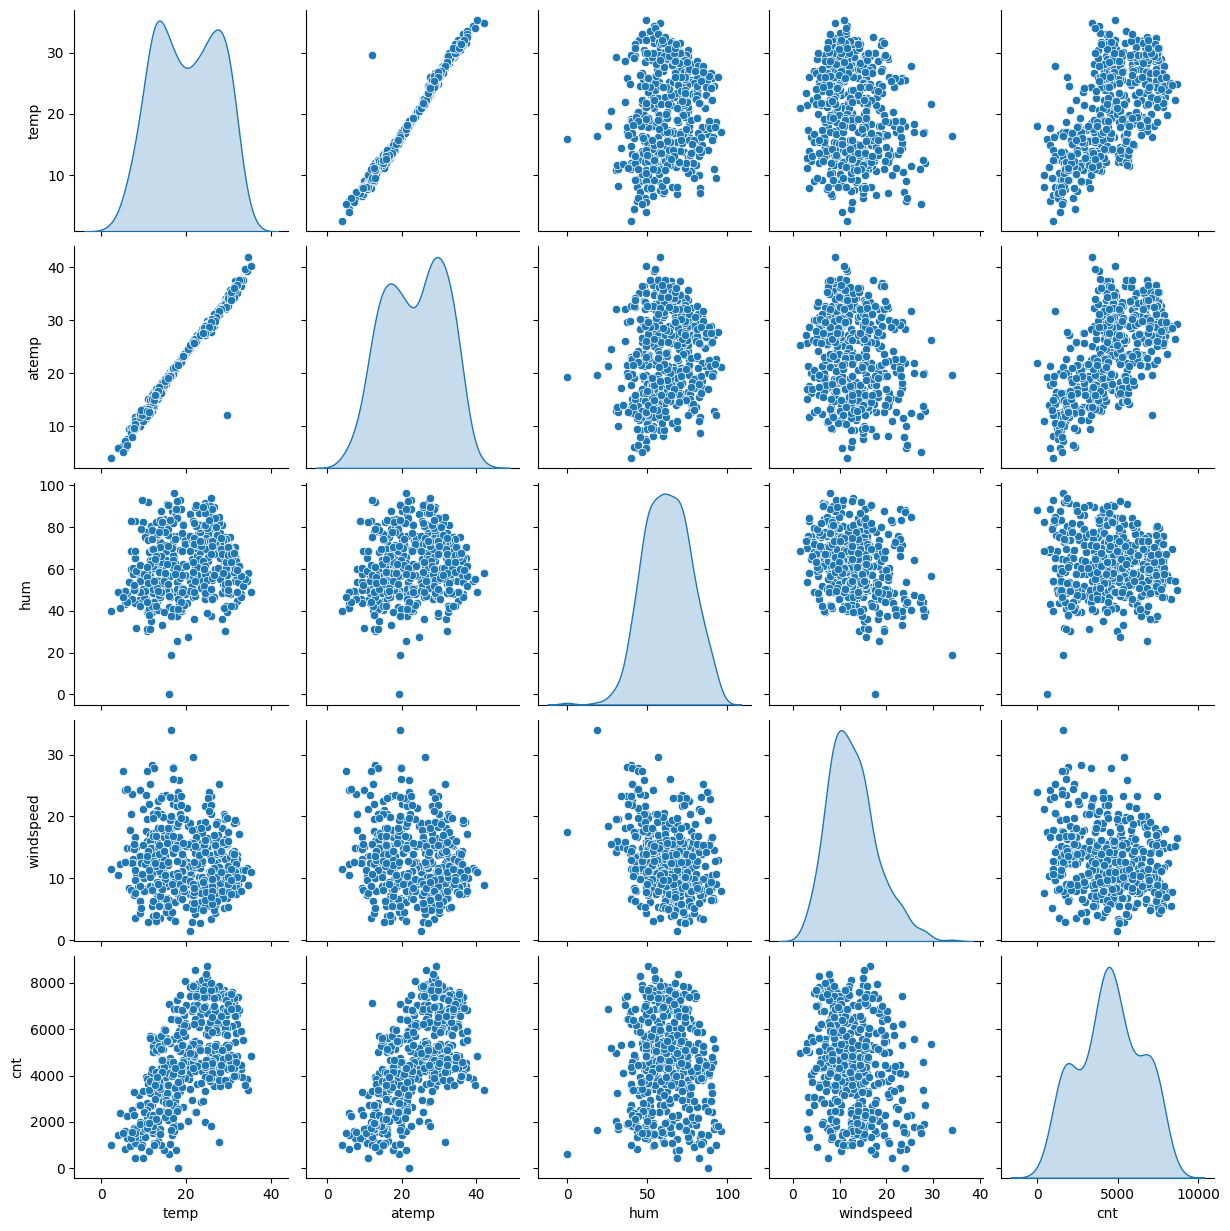

In [1021]:
# Create a new dataframe of only numeric variables:

bike_data_num=bike_data_train[[ 'temp', 'atemp', 'hum', 'windspeed','cnt']]

sns.pairplot(bike_data_num, diag_kind='kde')
plt.show()

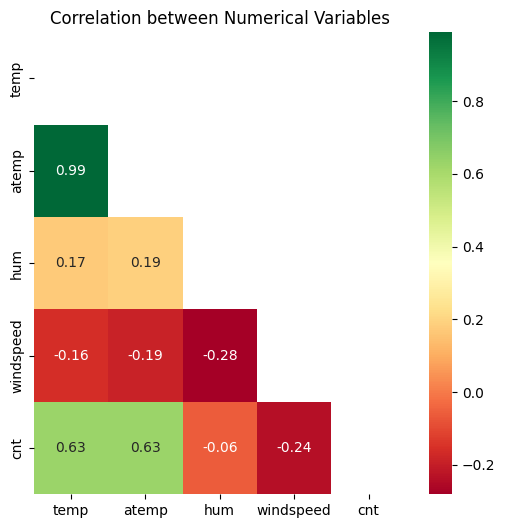

In [1022]:
# Checking the correlation between the numerical variables

plt.figure(figsize = (6,6))
matrix = np.triu(bike_data_train[['temp', 'atemp', 'hum', 'windspeed','cnt']].corr())
sns.heatmap(bike_data_train[['temp', 'atemp', 'hum', 'windspeed','cnt']].corr(), annot = True, cmap="RdYlGn", mask=matrix)
plt.title("Correlation between Numerical Variables")
plt.show()

#### We observe somewhat linear relationship visible between temp, atemp and cnt and good correlation between temp and cnt & atemp and cnt.

## Checking Categorical Variables

In [1023]:
bike_data_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 510 entries, 483 to 366
Data columns (total 30 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   yr            510 non-null    int64  
 1   holiday       510 non-null    int64  
 2   workingday    510 non-null    int64  
 3   temp          510 non-null    float64
 4   atemp         510 non-null    float64
 5   hum           510 non-null    float64
 6   windspeed     510 non-null    float64
 7   cnt           510 non-null    int64  
 8   season_2      510 non-null    uint8  
 9   season_3      510 non-null    uint8  
 10  season_4      510 non-null    uint8  
 11  mnth_2        510 non-null    uint8  
 12  mnth_3        510 non-null    uint8  
 13  mnth_4        510 non-null    uint8  
 14  mnth_5        510 non-null    uint8  
 15  mnth_6        510 non-null    uint8  
 16  mnth_7        510 non-null    uint8  
 17  mnth_8        510 non-null    uint8  
 18  mnth_9        510 non-null  

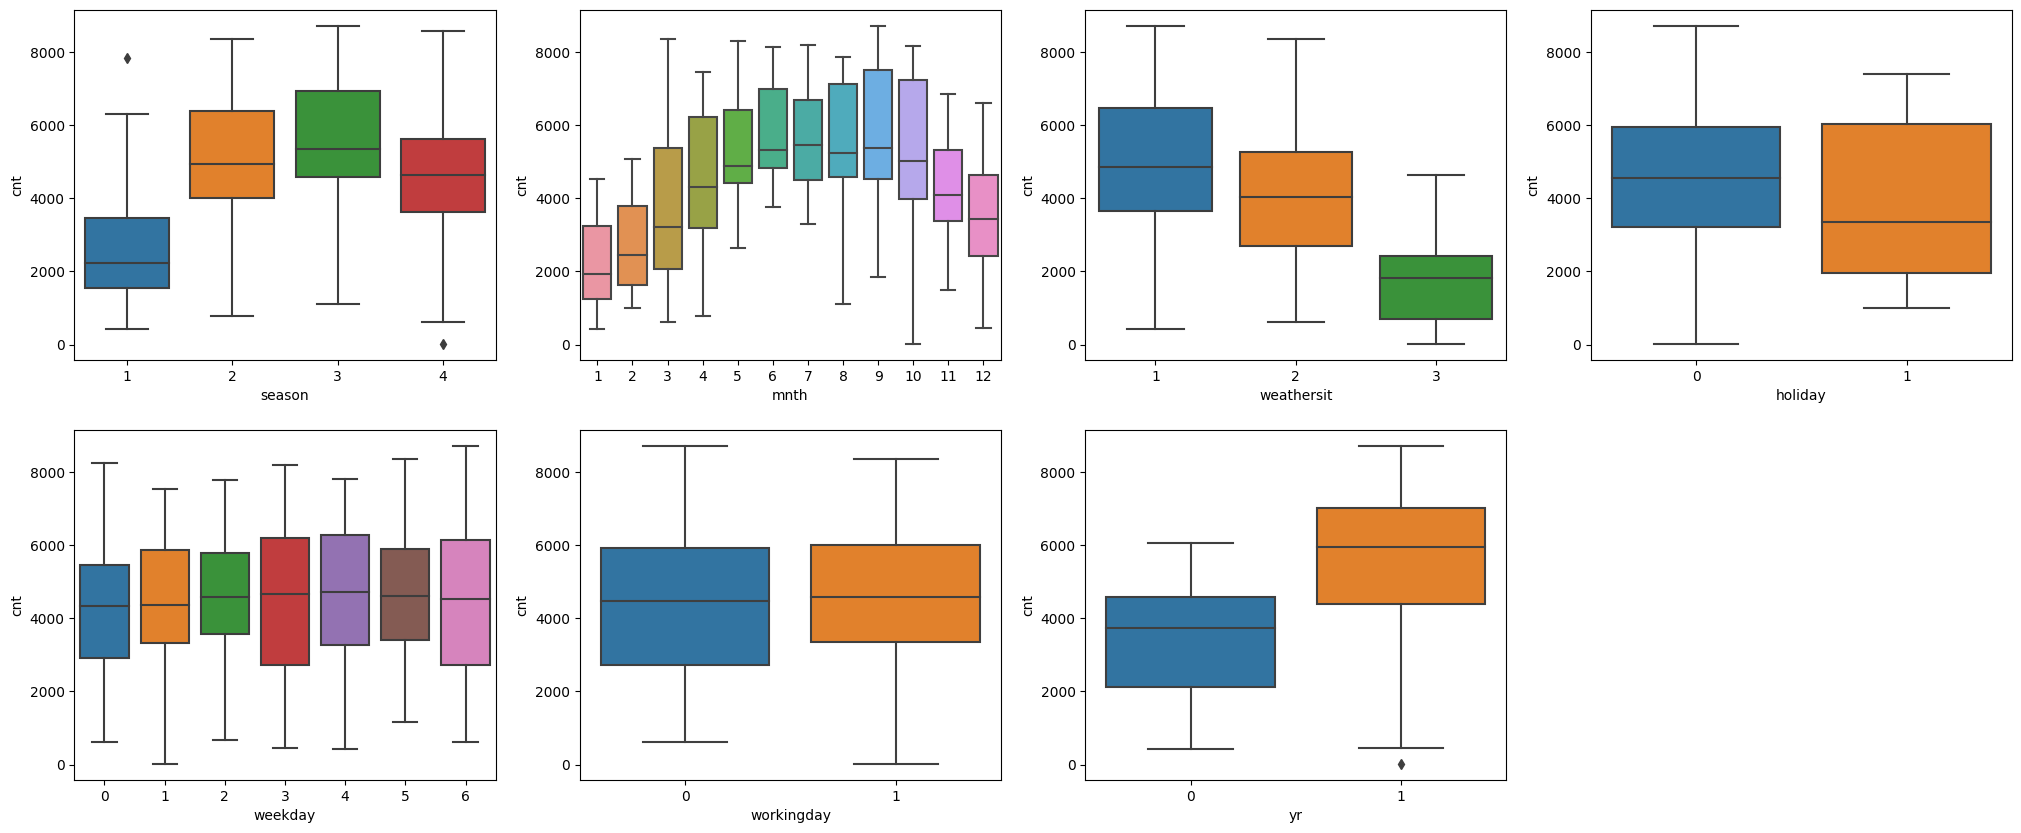

In [1024]:
# Build boxplot of all categorical variables (before creating dummies) againt the target variable 'cnt' 
# to see how each of the predictor variable stackup against the target variable.

plt.figure(figsize=(25, 10))
plt.subplot(2,4,1)
sns.boxplot(x = 'season', y = 'cnt', data = bike_data)
plt.subplot(2,4,2)
sns.boxplot(x = 'mnth', y = 'cnt', data = bike_data)
plt.subplot(2,4,3)
sns.boxplot(x = 'weathersit', y = 'cnt', data = bike_data)
plt.subplot(2,4,4)
sns.boxplot(x = 'holiday', y = 'cnt', data = bike_data)
plt.subplot(2,4,5)
sns.boxplot(x = 'weekday', y = 'cnt', data = bike_data)
plt.subplot(2,4,6)
sns.boxplot(x = 'workingday', y = 'cnt', data = bike_data)
plt.subplot(2,4,7)
sns.boxplot(x = 'yr', y = 'cnt', data = bike_data)
plt.show()

In [1025]:
# function to create barplot related to categorical columns

def plot_cat_columns(column):
    plt.figure(figsize = (12,6))
    plt.subplot(1,2,1)
    sns.barplot(bike_data,x=column,y='cnt')
    plt.subplot(1,2,2)
    sns.barplot(bike_data,x=column,y='cnt', hue='yr',palette='Set1')
    plt.legend(labels=['2018', '2019'])
    plt.show()

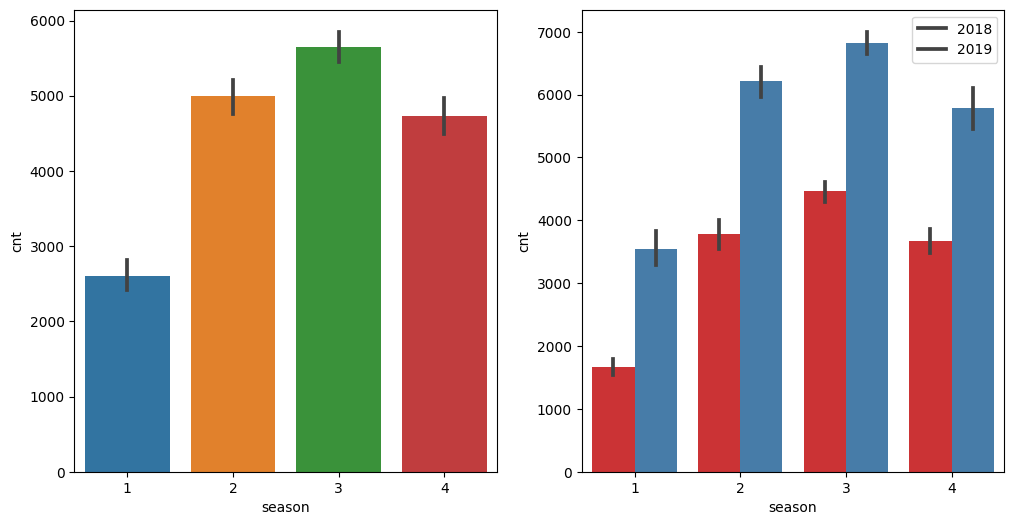

In [1026]:
# plotting visualization for season column

plot_cat_columns('season')

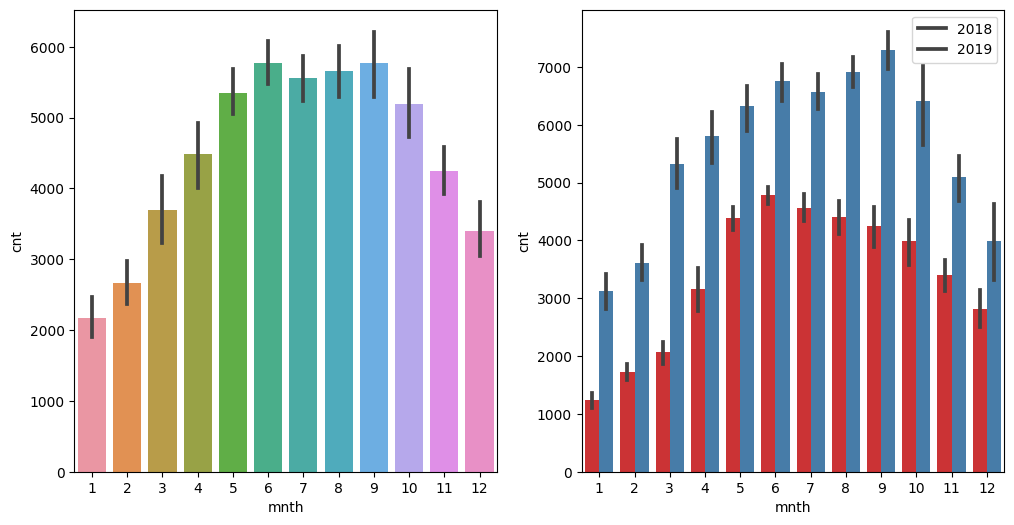

In [1027]:
# plotting visualization for month column

plot_cat_columns('mnth')

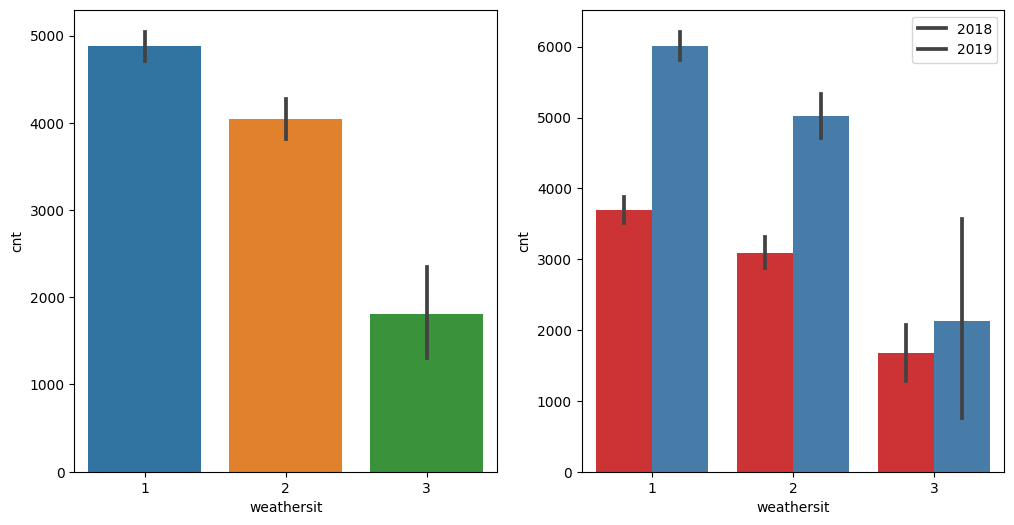

In [1028]:
# plotting visualization for weathersit column

plot_cat_columns('weathersit')

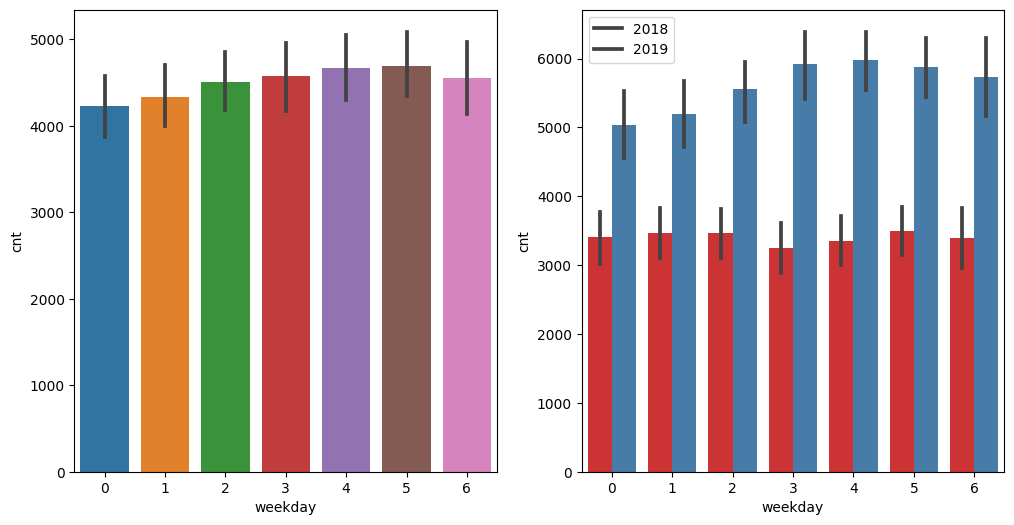

In [1029]:
# plotting visualization for weekday column

plot_cat_columns('weekday')

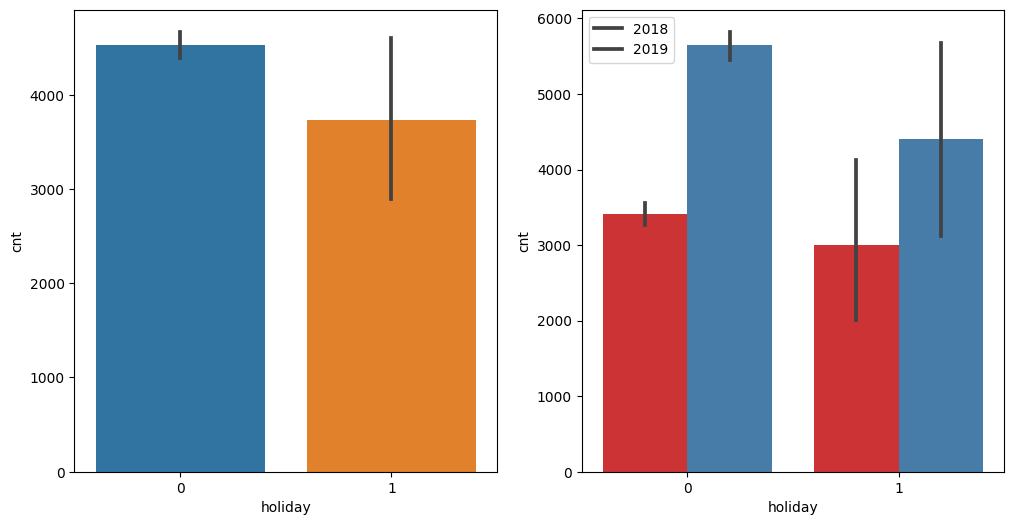

In [1030]:
# plotting visualization for holiday column

plot_cat_columns('holiday')

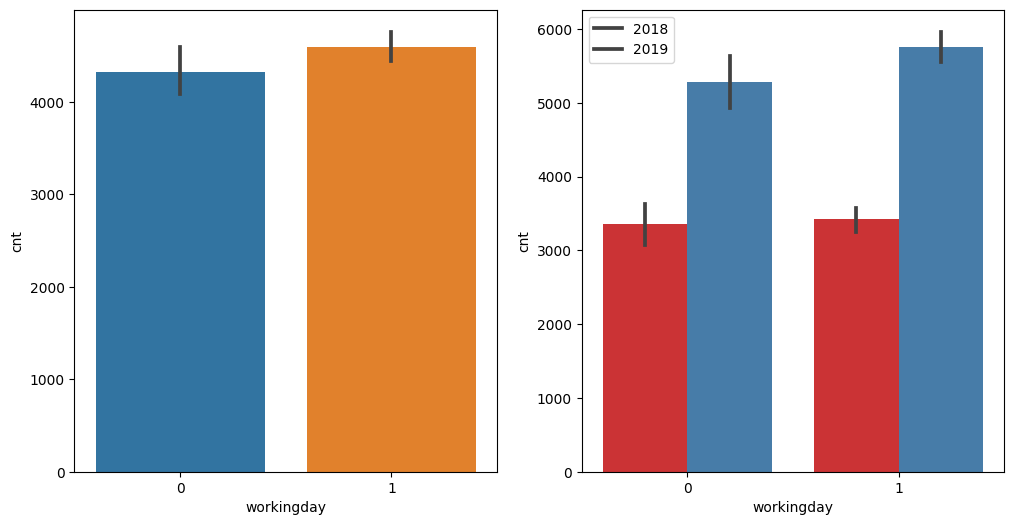

In [1031]:
# plotting visualization for workingday column

plot_cat_columns('workingday')

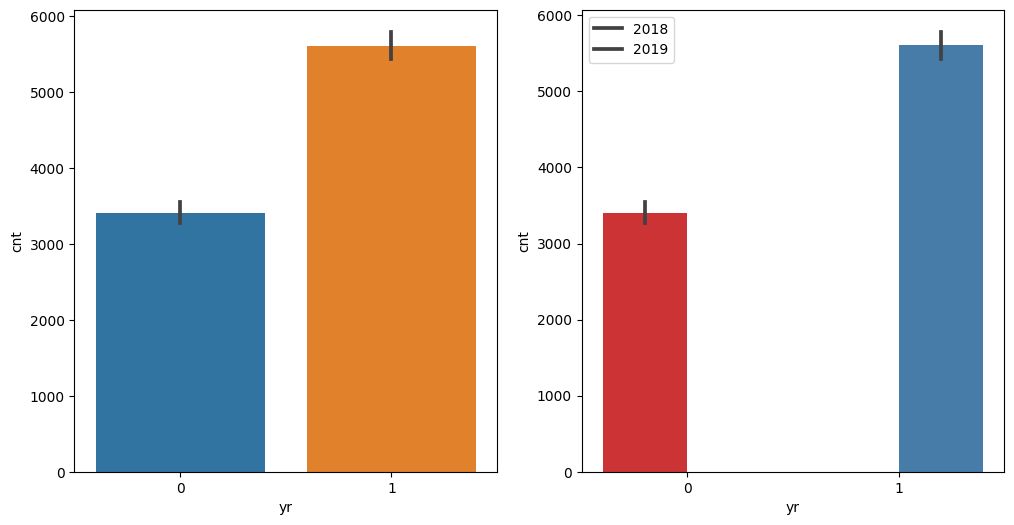

In [1032]:
# plotting visualization for year column

plot_cat_columns('yr')

### Insights
#### Total 7 categorical values that we plotted graph with
#### Used box plot to study variables effect on cnt columns which is our target column



### Inferences 

#### Roughly 30-35% booking happened in season 3 with highest median greater than 5000 , followed by season 2 and season 5 which have roughly around 25-27% percentage of bookings. Season can be a good predictor.
#### Mnth- Roughly 10% bookings in all months but with median over 4000 for months like 5,6,7,8,9 & 10. Can be good column for prediction of bookings.
#### weathersit - Good amount of bookings happened during weathersit 1 and having good median of around 5000. Can be used for predicition of target column.
#### holiday - Most bookings happened when it is not holiday , seems like a biased column and hence cannot be picked for analysis.
#### weekday - almost all days have similar kind of graphs with almost similar medians as well.This variable may or may not have influence. We can decide during model building.
#### working day - Good amount of bookings happend in workday and have good median around 5000 too. Might turn out to be a good predictor for the target variable.
#### yr - More bookings happened in 2019 than 2018.

# Correlation Matrix Analysis

In [1033]:
# Checking columns in our current dataset to see which columns are highly or not at all correlated.

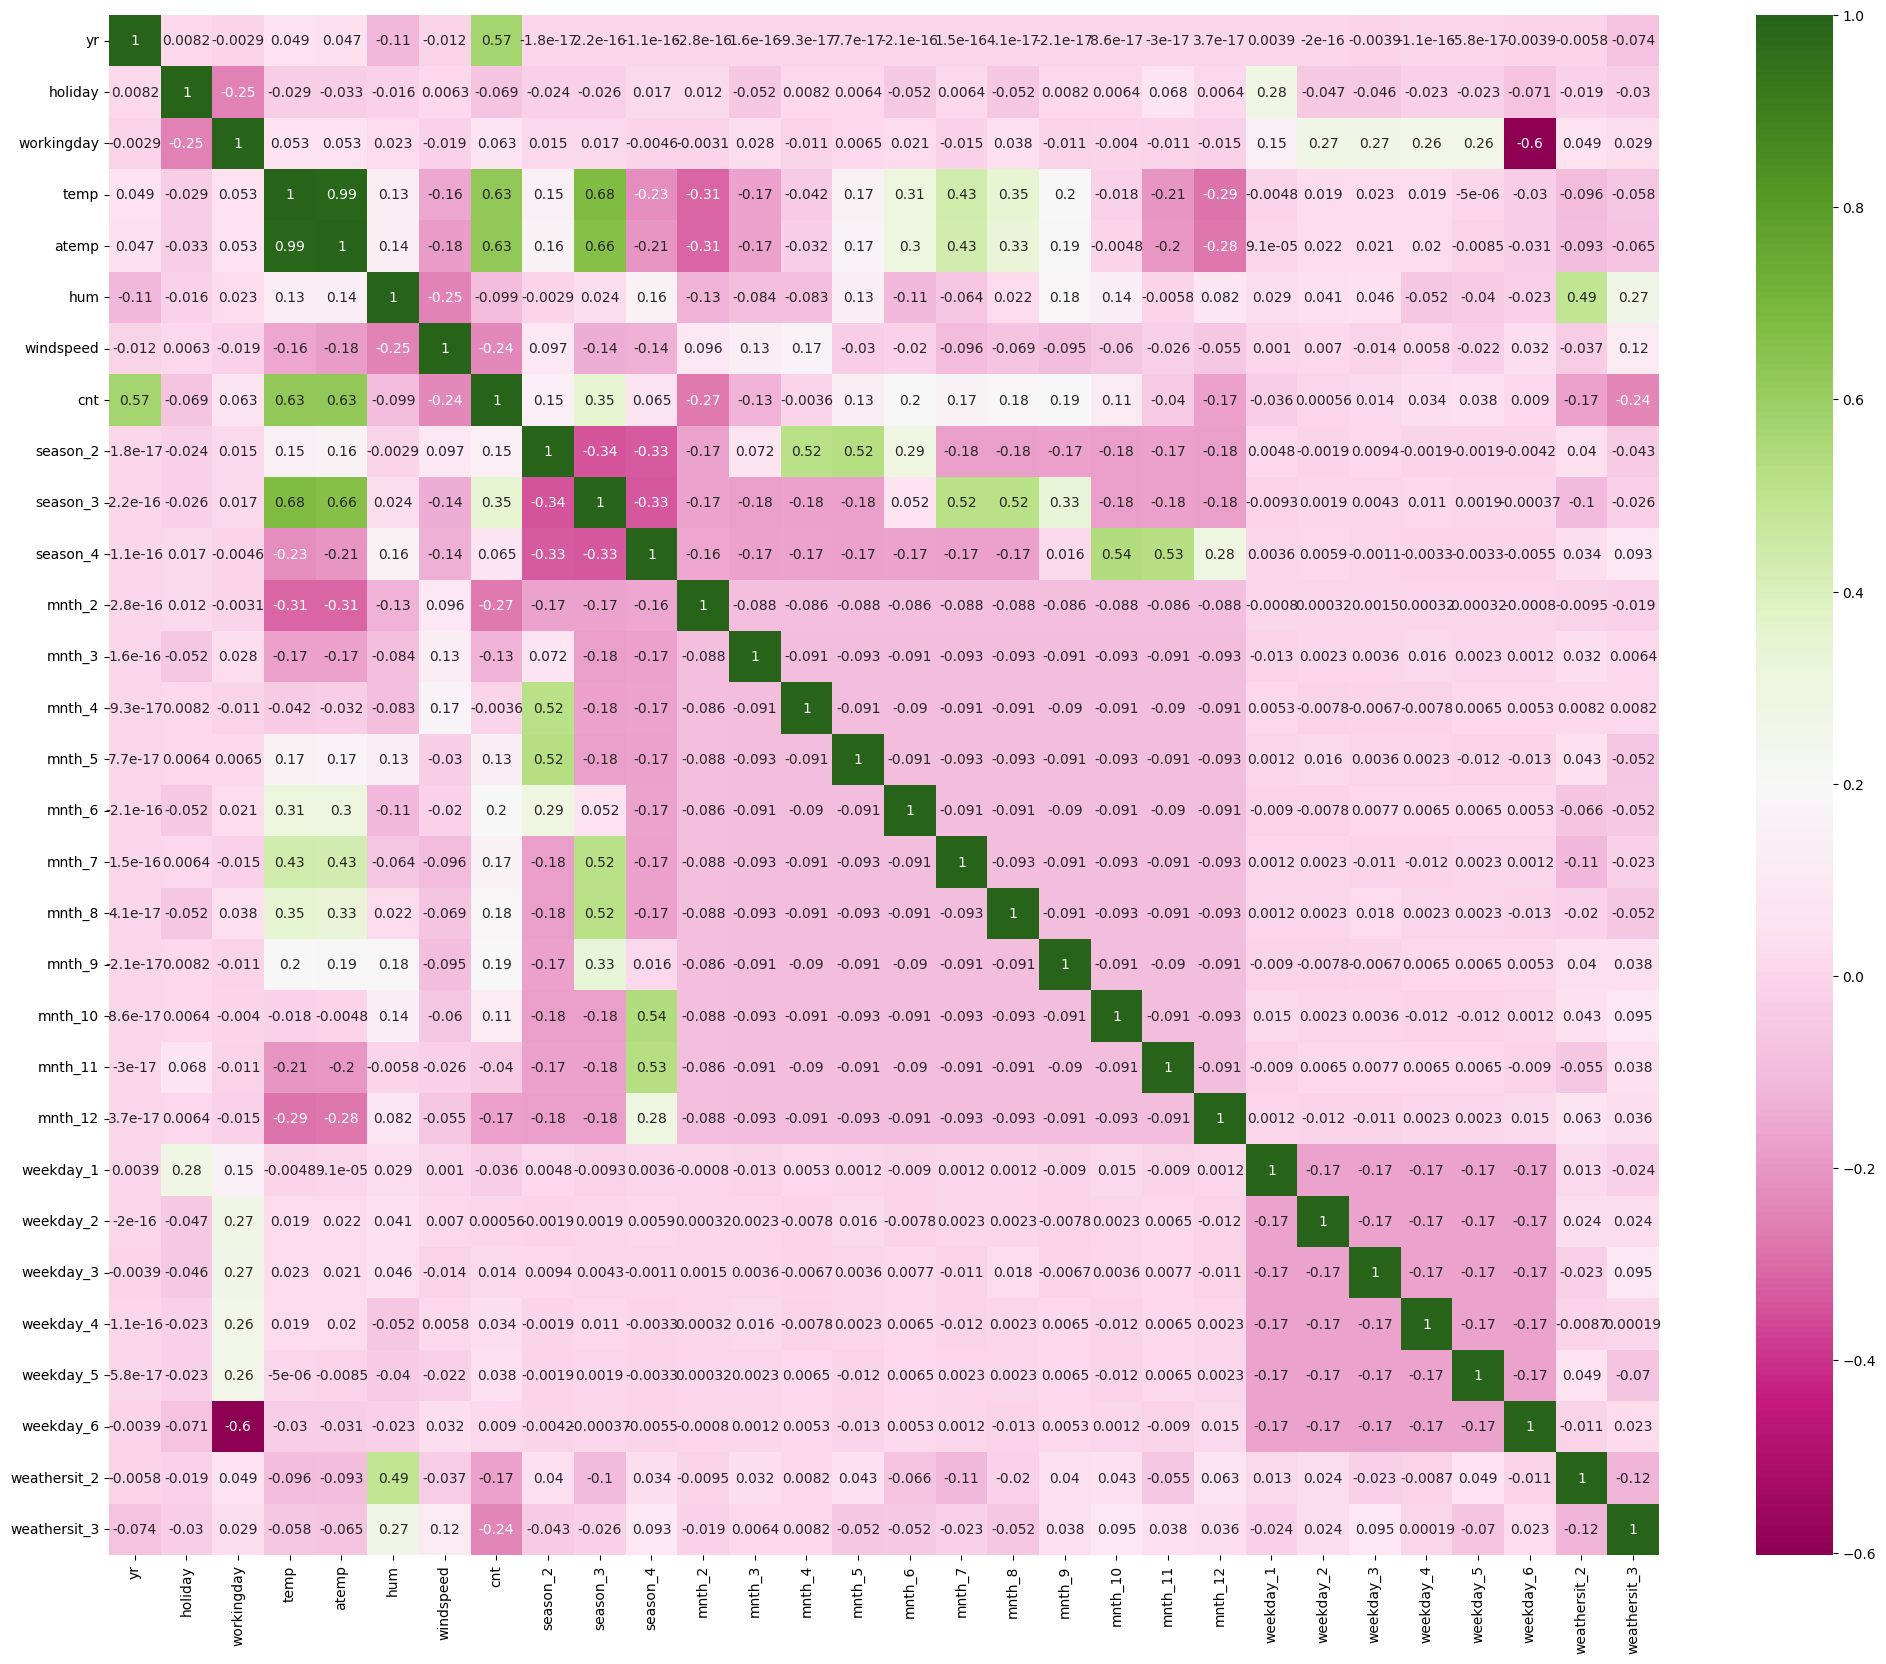

In [1034]:
plt.figure(figsize = (25,20))
sns.heatmap(bike_data_filtered.corr(), annot = True, cmap="PiYG")
plt.show()


In [1035]:
# Shows lot of variables which are multicollinear. We will use this during model building to & fro with VIF & p-value to create the best model.

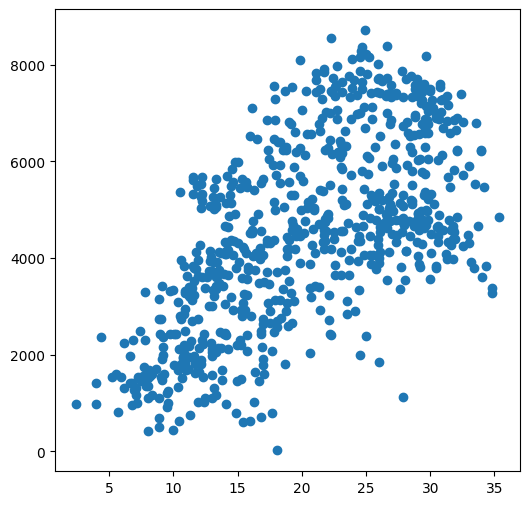

In [1036]:
# Visualizing one of the correlation to see the trends via Scatter plot.

plt.figure(figsize=[6,6])
plt.scatter(bike_data_filtered.temp, bike_data_filtered.cnt)
plt.show()

#### Visualization confirms the positive correlation between temp and cnt.

# Rescaling the Features

In [1037]:
# Importing MinMaxScalaer
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [1038]:
bike_data_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 510 entries, 483 to 366
Data columns (total 30 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   yr            510 non-null    int64  
 1   holiday       510 non-null    int64  
 2   workingday    510 non-null    int64  
 3   temp          510 non-null    float64
 4   atemp         510 non-null    float64
 5   hum           510 non-null    float64
 6   windspeed     510 non-null    float64
 7   cnt           510 non-null    int64  
 8   season_2      510 non-null    uint8  
 9   season_3      510 non-null    uint8  
 10  season_4      510 non-null    uint8  
 11  mnth_2        510 non-null    uint8  
 12  mnth_3        510 non-null    uint8  
 13  mnth_4        510 non-null    uint8  
 14  mnth_5        510 non-null    uint8  
 15  mnth_6        510 non-null    uint8  
 16  mnth_7        510 non-null    uint8  
 17  mnth_8        510 non-null    uint8  
 18  mnth_9        510 non-null  

In [1039]:
# Checking the values before scaling
bike_data_train.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_2,season_3,...,mnth_11,mnth_12,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,weathersit_2,weathersit_3
483,1,0,0,18.791653,22.50605,58.7083,7.832836,6304,1,0,...,0,0,0,0,0,0,0,0,0,0
650,1,0,0,16.126653,19.56980,49.4583,9.791514,7109,0,0,...,0,0,0,0,0,0,0,1,0,0
212,0,0,1,31.638347,35.16460,55.0833,10.500039,4266,0,1,...,0,0,1,0,0,0,0,0,0,0
714,1,0,0,14.862500,18.49690,83.8750,6.749714,3786,0,0,...,0,1,0,0,0,0,0,0,1,0
8,0,0,0,5.671653,5.80875,43.4167,24.250650,822,0,0,...,0,0,0,0,0,0,0,0,0,0


In [1040]:
bike_data_train.columns

Index(['yr', 'holiday', 'workingday', 'temp', 'atemp', 'hum', 'windspeed',
       'cnt', 'season_2', 'season_3', 'season_4', 'mnth_2', 'mnth_3', 'mnth_4',
       'mnth_5', 'mnth_6', 'mnth_7', 'mnth_8', 'mnth_9', 'mnth_10', 'mnth_11',
       'mnth_12', 'weekday_1', 'weekday_2', 'weekday_3', 'weekday_4',
       'weekday_5', 'weekday_6', 'weathersit_2', 'weathersit_3'],
      dtype='object')

In [1041]:
num_vars = ['temp', 'atemp', 'hum', 'windspeed','cnt']

bike_data_train[num_vars] = scaler.fit_transform(bike_data_train[num_vars])

In [1042]:
# Checking the values after scaling
bike_data_train.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_2,season_3,...,mnth_11,mnth_12,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,weathersit_2,weathersit_3
483,1,0,0,0.497426,0.487055,0.609956,0.194850,0.722734,1,0,...,0,0,0,0,0,0,0,0,0,0
650,1,0,0,0.416433,0.409971,0.513852,0.255118,0.815347,0,0,...,0,0,0,0,0,0,0,1,0,0
212,0,0,1,0.887856,0.819376,0.572294,0.276919,0.488265,0,1,...,0,0,1,0,0,0,0,0,0,0
714,1,0,0,0.378013,0.381804,0.871429,0.161523,0.433042,0,0,...,0,1,0,0,0,0,0,0,1,0
8,0,0,0,0.098690,0.048706,0.451083,0.700017,0.092039,0,0,...,0,0,0,0,0,0,0,0,0,0


In [1043]:
bike_data_train.describe()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_2,season_3,...,mnth_11,mnth_12,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,weathersit_2,weathersit_3
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,...,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.501961,0.023529,0.682353,0.540901,0.515631,0.647390,0.346318,0.515144,0.247059,0.262745,...,0.086275,0.076471,0.139216,0.141176,0.150980,0.129412,0.145098,0.150980,0.341176,0.025490
std,0.500487,0.151726,0.466018,0.227898,0.213626,0.149722,0.160266,0.224281,0.431725,0.440557,...,0.281045,0.266010,0.346511,0.348545,0.358381,0.335985,0.352545,0.358381,0.474570,0.157763
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.343228,0.335807,0.536147,0.230784,0.359468,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,1.000000,0.540519,0.525578,0.646367,0.325635,0.516337,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.740406,0.692378,0.757900,0.434287,0.685861,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### So we applied scaling on the numeric variables

# Building Linear Model 

In [1044]:
# Building Linear Model
y_train = bike_data_train.pop('cnt')
X_train = bike_data_train

In [1045]:
# Checking y_train data
y_train.head()

483    0.722734
650    0.815347
212    0.488265
714    0.433042
8      0.092039
Name: cnt, dtype: float64

In [1046]:
# Checking x_train data
X_train.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,season_2,season_3,season_4,...,mnth_11,mnth_12,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,weathersit_2,weathersit_3
483,1,0,0,0.497426,0.487055,0.609956,0.194850,1,0,0,...,0,0,0,0,0,0,0,0,0,0
650,1,0,0,0.416433,0.409971,0.513852,0.255118,0,0,1,...,0,0,0,0,0,0,0,1,0,0
212,0,0,1,0.887856,0.819376,0.572294,0.276919,0,1,0,...,0,0,1,0,0,0,0,0,0,0
714,1,0,0,0.378013,0.381804,0.871429,0.161523,0,0,1,...,0,1,0,0,0,0,0,0,1,0
8,0,0,0,0.098690,0.048706,0.451083,0.700017,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### RFE
#### Recursive feature elimination: We will be using the LinearRegression function from SciKit Learn for its compatibility with RFE (which is a utility from sklearn)



In [1047]:
# Importing RFE and LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [1048]:
# Running RFE with the output number of the variable equal to 15
lm = LinearRegression()
lm.fit(X_train, y_train)

# rfe = RFE(lm)             # running RFE
rfe =  RFE(lm, n_features_to_select=15)
rfe = rfe.fit(X_train, y_train)

In [1049]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))


[('yr', True, 1),
 ('holiday', False, 10),
 ('workingday', False, 5),
 ('temp', True, 1),
 ('atemp', True, 1),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('season_2', True, 1),
 ('season_3', False, 15),
 ('season_4', True, 1),
 ('mnth_2', False, 12),
 ('mnth_3', True, 1),
 ('mnth_4', True, 1),
 ('mnth_5', True, 1),
 ('mnth_6', True, 1),
 ('mnth_7', False, 2),
 ('mnth_8', True, 1),
 ('mnth_9', True, 1),
 ('mnth_10', True, 1),
 ('mnth_11', False, 13),
 ('mnth_12', False, 14),
 ('weekday_1', False, 6),
 ('weekday_2', False, 11),
 ('weekday_3', False, 8),
 ('weekday_4', False, 9),
 ('weekday_5', False, 7),
 ('weekday_6', False, 4),
 ('weathersit_2', False, 3),
 ('weathersit_3', True, 1)]

In [1050]:
col = X_train.columns[rfe.support_]
col

Index(['yr', 'temp', 'atemp', 'hum', 'windspeed', 'season_2', 'season_4',
       'mnth_3', 'mnth_4', 'mnth_5', 'mnth_6', 'mnth_8', 'mnth_9', 'mnth_10',
       'weathersit_3'],
      dtype='object')

In [1051]:
X_train.columns[~rfe.support_]

Index(['holiday', 'workingday', 'season_3', 'mnth_2', 'mnth_7', 'mnth_11',
       'mnth_12', 'weekday_1', 'weekday_2', 'weekday_3', 'weekday_4',
       'weekday_5', 'weekday_6', 'weathersit_2'],
      dtype='object')

In [1052]:
# Creating X_test dataframe with RFE selected variables
X_train_rfe = X_train[col]

## Building Linear Model using 'STATS MODEL'

### Model 1

In [1053]:
# VIF Check
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,temp,372.80
2,atemp,367.48
3,hum,10.93
5,season_2,7.27
4,windspeed,4.58
9,mnth_5,4.27
8,mnth_4,3.84
10,mnth_6,2.44
6,season_4,2.33
0,yr,2.01


In [1054]:
import statsmodels.api as sm

# Add a constant
X_train_lm1 = sm.add_constant(X_train_rfe)

# Create a first fitted model
lr1 = sm.OLS(y_train, X_train_lm1).fit()

In [1055]:
# Check the parameters obtained

lr1.params

const           0.275798
yr              0.225942
temp            0.508230
atemp           0.068948
hum            -0.288437
windspeed      -0.208933
season_2        0.060697
season_4        0.133475
mnth_3          0.047287
mnth_4          0.036984
mnth_5          0.050987
mnth_6          0.032058
mnth_8          0.044644
mnth_9          0.128395
mnth_10         0.047801
weathersit_3   -0.213940
dtype: float64

In [1056]:
# Print a summary of the linear regression model obtained
print(lr1.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.829
Model:                            OLS   Adj. R-squared:                  0.823
Method:                 Least Squares   F-statistic:                     159.2
Date:                Sat, 08 Apr 2023   Prob (F-statistic):          4.13e-178
Time:                        08:58:33   Log-Likelihood:                 488.93
No. Observations:                 510   AIC:                            -945.9
Df Residuals:                     494   BIC:                            -878.1
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.2758      0.028      9.961   

### Model 2

In [1057]:
#Removing the variable 'atemp' based on its High p-value & High VIF. 

In [1058]:
X_train_new = X_train_rfe.drop(["atemp"], axis = 1)

In [1059]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_new.columns
vif['VIF'] = [variance_inflation_factor(X_train_new.values, i) for i in range(X_train_new.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,temp,11.01
2,hum,10.69
4,season_2,7.27
3,windspeed,4.43
8,mnth_5,4.27
7,mnth_4,3.83
9,mnth_6,2.44
5,season_4,2.30
0,yr,2.01
10,mnth_8,1.81


In [1060]:
# Add a constant
X_train_lm2 = sm.add_constant(X_train_new)

# Create a first fitted model
lr2 = sm.OLS(y_train, X_train_lm2).fit()

In [1061]:
# Check the parameters obtained

lr2.params

const           0.276883
yr              0.225918
temp            0.572939
hum            -0.287911
windspeed      -0.211690
season_2        0.060850
season_4        0.134065
mnth_3          0.047639
mnth_4          0.037725
mnth_5          0.051111
mnth_6          0.031818
mnth_8          0.043424
mnth_9          0.127869
mnth_10         0.047839
weathersit_3   -0.214439
dtype: float64

In [1062]:
# Print a summary of the linear regression model obtained
print(lr2.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.828
Model:                            OLS   Adj. R-squared:                  0.824
Method:                 Least Squares   F-statistic:                     170.8
Date:                Sat, 08 Apr 2023   Prob (F-statistic):          3.48e-179
Time:                        08:58:34   Log-Likelihood:                 488.81
No. Observations:                 510   AIC:                            -947.6
Df Residuals:                     495   BIC:                            -884.1
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.2769      0.028     10.042   

### Model 3

In [1063]:
#Removing the variable 'hum' based on its Very High 'VIF' value.
# Even though the VIF of hum is second highest, we decided to drop 'hum' and not 'temp' based on general knowledge that temperature can be an important factor for a business like bike rentals, and wanted to retain 'temp'.

In [1064]:
X_train_new = X_train_new.drop(["hum"], axis = 1)

In [1065]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_new.columns
vif['VIF'] = [variance_inflation_factor(X_train_new.values, i) for i in range(X_train_new.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,season_2,7.22
1,temp,6.82
7,mnth_5,4.27
6,mnth_4,3.83
2,windspeed,3.76
8,mnth_6,2.39
4,season_4,2.04
0,yr,2.01
9,mnth_8,1.80
11,mnth_10,1.65


In [1066]:
# Add a constant
X_train_lm3 = sm.add_constant(X_train_new)

# Create a first fitted model
lr3 = sm.OLS(y_train, X_train_lm3).fit()

In [1067]:
lr3.params


const           0.086403
yr              0.233876
temp            0.548856
windspeed      -0.148058
season_2        0.049656
season_4        0.122868
mnth_3          0.055882
mnth_4          0.043400
mnth_5          0.038014
mnth_6          0.049103
mnth_8          0.039549
mnth_9          0.108401
mnth_10         0.036341
weathersit_3   -0.279898
dtype: float64

In [1068]:
# Print a summary of the linear regression model obtained
print(lr3.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.800
Model:                            OLS   Adj. R-squared:                  0.795
Method:                 Least Squares   F-statistic:                     152.9
Date:                Sat, 08 Apr 2023   Prob (F-statistic):          5.17e-164
Time:                        08:58:35   Log-Likelihood:                 449.99
No. Observations:                 510   AIC:                            -872.0
Df Residuals:                     496   BIC:                            -812.7
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.0864      0.019      4.520   

### Model 4

In [1069]:
# Removing the variable 'season_2' based on its Very High 'VIF' value.


In [1070]:
X_train_new = X_train_new.drop(["season_2"], axis = 1)

In [1071]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_new.columns
vif['VIF'] = [variance_inflation_factor(X_train_new.values, i) for i in range(X_train_new.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,temp,6.82
2,windspeed,3.76
3,season_4,2.04
0,yr,2.01
8,mnth_8,1.80
10,mnth_10,1.65
7,mnth_6,1.53
6,mnth_5,1.50
9,mnth_9,1.42
5,mnth_4,1.33


In [1072]:
# Add a constant
X_train_lm4 = sm.add_constant(X_train_new)

# Create a first fitted model
lr4 = sm.OLS(y_train, X_train_lm4).fit()

In [1073]:
# Check the parameters obtained

lr4.params

const           0.088549
yr              0.233499
temp            0.545891
windspeed      -0.149958
season_4        0.122632
mnth_3          0.071905
mnth_4          0.093339
mnth_5          0.088305
mnth_6          0.080975
mnth_8          0.040603
mnth_9          0.109037
mnth_10         0.036577
weathersit_3   -0.278362
dtype: float64

In [1074]:
# Print a summary of the linear regression model obtained
print(lr4.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.799
Model:                            OLS   Adj. R-squared:                  0.794
Method:                 Least Squares   F-statistic:                     164.2
Date:                Sat, 08 Apr 2023   Prob (F-statistic):          3.09e-164
Time:                        08:58:37   Log-Likelihood:                 447.86
No. Observations:                 510   AIC:                            -869.7
Df Residuals:                     497   BIC:                            -814.7
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.0885      0.019      4.624   

### Model 5

In [1075]:
# Removing the variable 'mnth_8' based on its Very High p-value.


In [1076]:
X_train_new = X_train_new.drop(["mnth_8"], axis = 1)


In [1077]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_new.columns
vif['VIF'] = [variance_inflation_factor(X_train_new.values, i) for i in range(X_train_new.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,temp,4.48
2,windspeed,3.72
0,yr,2.00
3,season_4,1.94
9,mnth_10,1.62
7,mnth_6,1.30
6,mnth_5,1.28
8,mnth_9,1.26
5,mnth_4,1.24
4,mnth_3,1.18


In [1078]:
# Add a constant
X_train_lm5 = sm.add_constant(X_train_new)

# Create a first fitted model
lr5 = sm.OLS(y_train, X_train_lm5).fit()

In [1079]:
# Check the parameters obtained

lr5.params


const           0.083970
yr              0.232764
temp            0.574597
windspeed      -0.150028
season_4        0.117896
mnth_3          0.065652
mnth_4          0.084053
mnth_5          0.074002
mnth_6          0.063670
mnth_9          0.095725
mnth_10         0.031388
weathersit_3   -0.280339
dtype: float64

In [1080]:
# Print a summary of the linear regression model obtained
print(lr5.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.797
Model:                            OLS   Adj. R-squared:                  0.792
Method:                 Least Squares   F-statistic:                     177.6
Date:                Sat, 08 Apr 2023   Prob (F-statistic):          1.97e-164
Time:                        08:58:38   Log-Likelihood:                 445.63
No. Observations:                 510   AIC:                            -867.3
Df Residuals:                     498   BIC:                            -816.4
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.0840      0.019      4.399   

### Model 6

In [1081]:
#Removing the variable 'mnth_10' based on its High 'p-value'.

In [1082]:
X_train_new = X_train_new.drop(["mnth_10"], axis = 1)


In [1083]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_new.columns
vif['VIF'] = [variance_inflation_factor(X_train_new.values, i) for i in range(X_train_new.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,temp,4.34
2,windspeed,3.68
0,yr,1.99
3,season_4,1.38
7,mnth_6,1.29
6,mnth_5,1.28
5,mnth_4,1.24
8,mnth_9,1.22
4,mnth_3,1.18
9,weathersit_3,1.05


In [1084]:
# Add a constant
X_train_lm6 = sm.add_constant(X_train_new)

# Create a first fitted model
lr6 = sm.OLS(y_train, X_train_lm6).fit()

In [1085]:
# Check the parameters obtained

lr6.params

const           0.082570
yr              0.231870
temp            0.580437
windspeed      -0.152419
season_4        0.129183
mnth_3          0.065965
mnth_4          0.083857
mnth_5          0.072684
mnth_6          0.061821
mnth_9          0.090881
weathersit_3   -0.276877
dtype: float64

In [1086]:
# Print a summary of the linear regression model obtained
print(lr6.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.796
Model:                            OLS   Adj. R-squared:                  0.792
Method:                 Least Squares   F-statistic:                     194.5
Date:                Sat, 08 Apr 2023   Prob (F-statistic):          4.74e-165
Time:                        08:58:39   Log-Likelihood:                 444.36
No. Observations:                 510   AIC:                            -866.7
Df Residuals:                     499   BIC:                            -820.1
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.0826      0.019      4.324   

### Insights
#### This model looks good, as there seems to be VERY LOW Multicollinearity between the predictors and the p-values for all the predictors seems to be significant. For now, we will consider this as our final model (unless the Test data metrics are not significantly close to this number).

## Final Model Interpretation


### Hypothesis Testing:


#### Hypothesis testing states that:

##### H0:B1=B2=...=Bn=0
##### H1: at least one Bi!=0

# lr6 model coefficient values


In [1087]:
print(lr6.params)

const           0.082570
yr              0.231870
temp            0.580437
windspeed      -0.152419
season_4        0.129183
mnth_3          0.065965
mnth_4          0.083857
mnth_5          0.072684
mnth_6          0.061821
mnth_9          0.090881
weathersit_3   -0.276877
dtype: float64


## Insights
#### From the lr6 model summary, it is evident that all our coefficients are not equal to zero which means We REJECT the NULL HYPOTHESIS.

## F-Statistics

### F-Statistics is used for testing the overall significance of the Model. Higher the F-Statistics, more significant the Model is.

### F-statistic: 194.5
### Prob(F-Statistic): 4.74e-165

## The F-Statistics value of 194.5 (which is greater than 1) and the p-value of '~0.0000' states that the overall model is significant

# The equation of best fitted surface based on model lr6:

cnt = 0.082570 + (yr × 0.231870) + (temp x 0.580437) - (windspeed x 0.152419) + (season_4 × 0.129183) + (mnth_3 × 0.065965) + (mnth_4 × 0.083857) + (mnth5 × 0.072684) + (mnth6 × 0.061821) + (mnth9 × 0.090881) − (weathersit3 × 0.276877)

## Interpretation of Coefficients:
temp: A coefficient value of ‘0.580437’ indicated that a unit increase in temp variable, increases the bike hire numbers by 0.580437 units.

yr: A coefficient value of ‘0.231870’ indicated that a unit increase in yr variable, increases the bike hire numbers by 0.231870 units.

windspeed: A coefficient value of ‘-0.152419’ indicated that, a unit increase in windspeed variable decreases the bike hire numbers by 0.152419 units.

season_4: A coefficient value of ‘0.129183’ indicated that w.r.t season_1, a unit increase in season_4 variable increases the bike hire numbers by 0.129183 units.

mnth_3: A coefficient value of ‘0.065965’ indicated that w.r.t mnth_1, a unit increase in mnth_9 variable increases the bike hire numbers by 0.065965 units.

mnth_4: A coefficient value of ‘0.083857’ indicated that w.r.t mnth_1, a unit increase in mnth_9 variable increases the bike hire numbers by 0.083857 units.

mnth_5: A coefficient value of ‘0.072684’ indicated that w.r.t mnth_1, a unit increase in mnth_9 variable increases the bike hire numbers by 0.072684 units.

mnth_6: A coefficient value of ‘0.061821’ indicated that w.r.t mnth_1, a unit increase in mnth_9 variable increases the bike hire numbers by 0.061821 units.

mnth_9: A coefficient value of ‘0.090881’ indicated that w.r.t mnth_1, a unit increase in mnth_9 variable increases the bike hire numbers by 0.090881 units.

weathersit_3: A coefficient value of ‘-0.276877’ indicated that, w.r.t Weathersit1, a unit increase in Weathersit3 variable, decreases the bike hire numbers by 0.276877 units.

const: The Constant value of ‘0.082570’ indicated that, in the absence of all other predictor variables (i.e. when x1,x2...xn =0), The bike rental can still increase by 0.082570 units.

# ASSUMPTIONS

### Residual Analysis Of Training Data

In [1088]:
X_train_lm6

,const,yr,temp,windspeed,season_4,mnth_3,mnth_4,mnth_5,mnth_6,mnth_9,weathersit_3
483,1.0,1,0.497426,0.194850,0,0,1,0,0,0,0
650,1.0,1,0.416433,0.255118,1,0,0,0,0,0,0
212,1.0,0,0.887856,0.276919,0,0,0,0,0,0,0
714,1.0,1,0.378013,0.161523,1,0,0,0,0,0,0
8,1.0,0,0.098690,0.700017,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
467,1.0,1,0.477697,0.274350,0,0,1,0,0,0,0
444,1.0,1,0.588804,0.138467,0,1,0,0,0,0,0
46,1.0,0,0.322889,0.472919,0,0,0,0,0,0,0
374,1.0,1,0.310971,0.340487,0,0,0,0,0,0,0


In [1089]:
y_train_pred = lr6.predict(X_train_lm6)


## Error terms are Normally distributed with mean zero (not X, Y)

Text(0.5, 0, 'Errors')

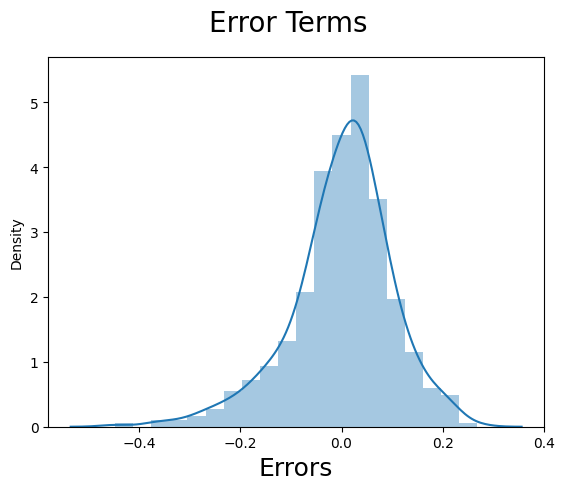

In [1090]:
res = y_train-y_train_pred
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((res), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)                         # X-label


### Insights
#### From the above histogram, we could see that the Residuals are normally distributed. Hence our one of the assumption for Linear Regression is valid.

## There is a linear relationship between X and Y

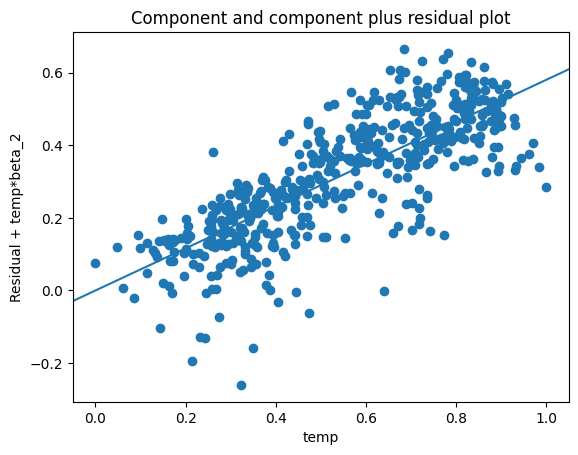

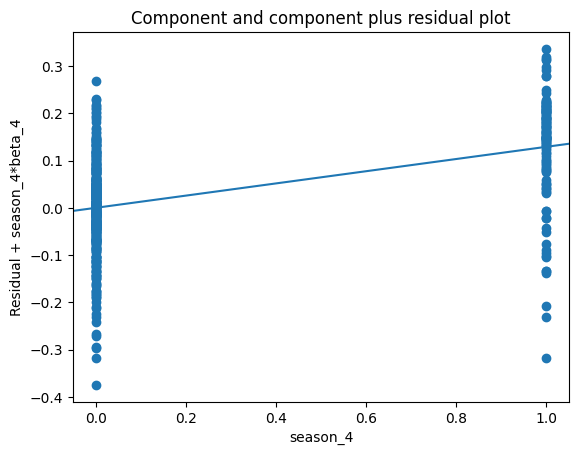

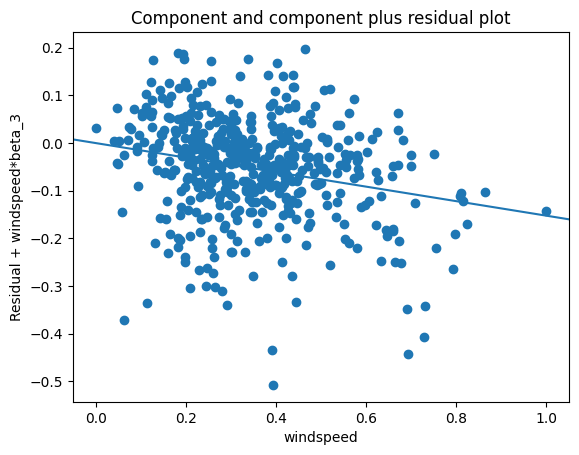

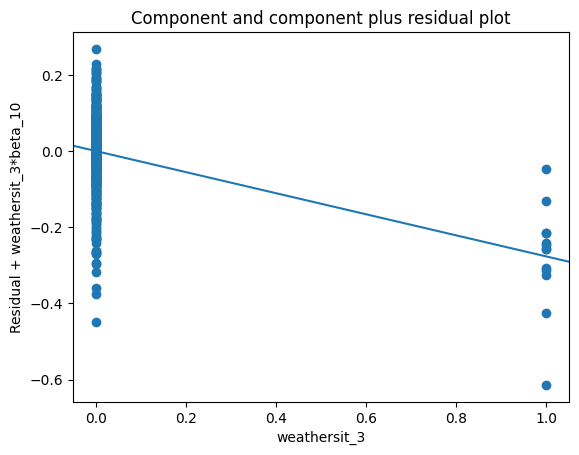

In [1091]:
# Linear relationship validation using CCPR plot
# Component and component plus residual plot

sm.graphics.plot_ccpr(lr6, 'temp')
plt.show()

sm.graphics.plot_ccpr(lr6, 'season_4')
plt.show()

sm.graphics.plot_ccpr(lr6, 'windspeed')
plt.show()

sm.graphics.plot_ccpr(lr6, 'weathersit_3')
plt.show()


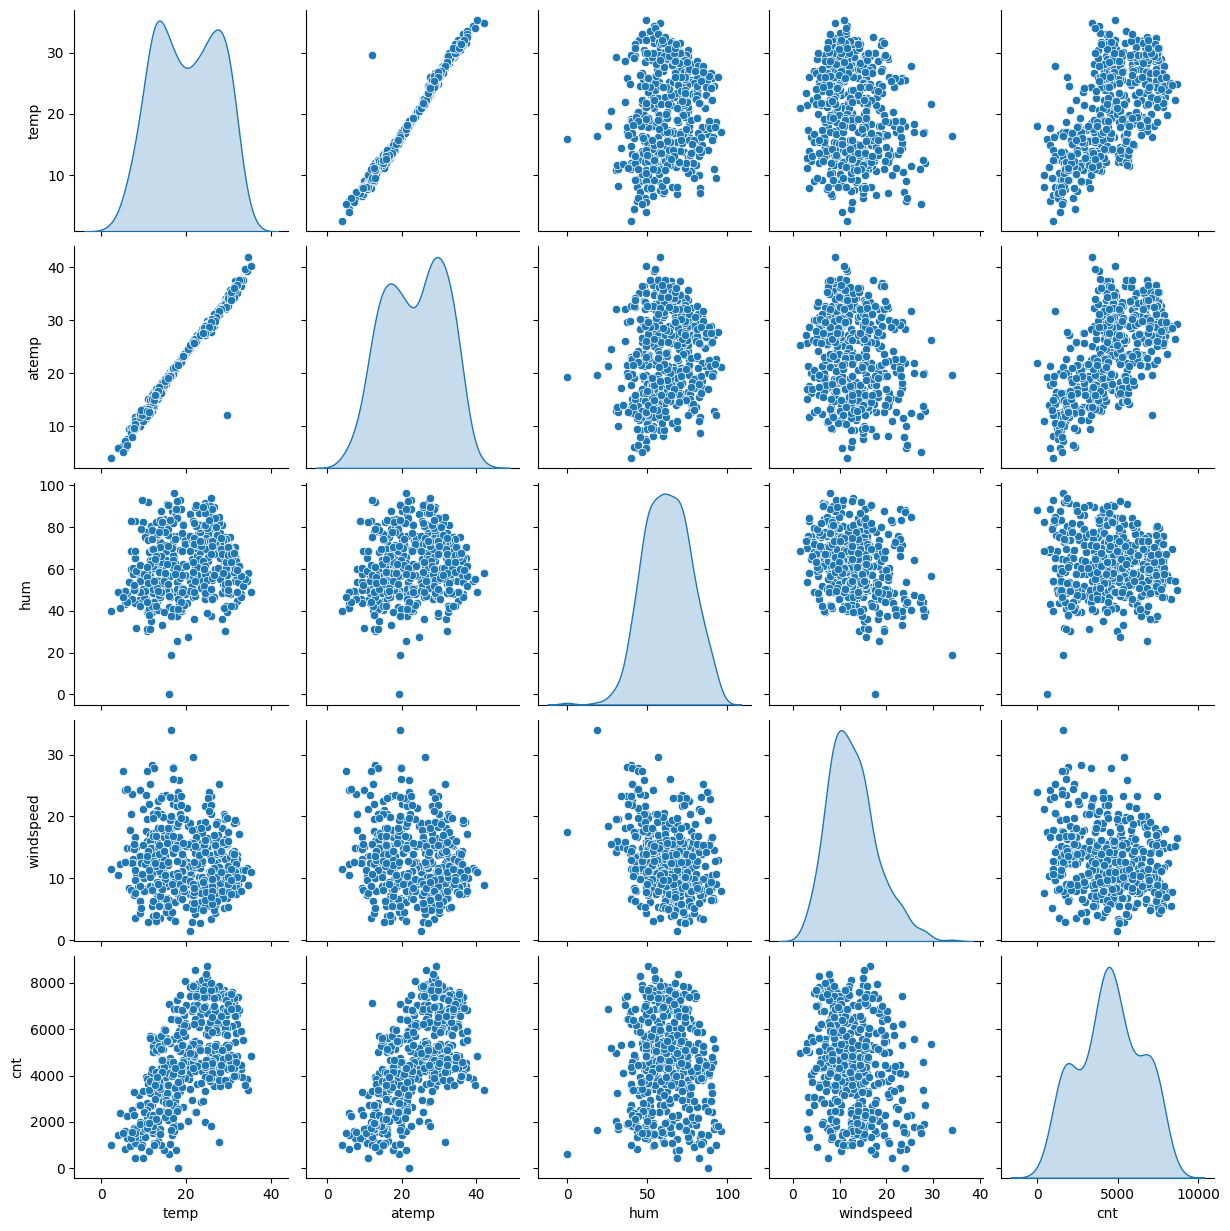

In [1092]:
bike_data_filtered=bike_data_filtered[[ 'temp', 'season_4', 'windspeed','weathersit_3']]

sns.pairplot(bike_data_num, diag_kind='kde')
plt.show()

### ## Using the pair plot & CCPR plot, we could see there is a linear relation between our variables with the predictor ‘cnt’.

## No Multicollinearity between the predictor variables

In [1093]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_new.columns
vif['VIF'] = [variance_inflation_factor(X_train_new.values, i) for i in range(X_train_new.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,temp,4.34
2,windspeed,3.68
0,yr,1.99
3,season_4,1.38
7,mnth_6,1.29
6,mnth_5,1.28
5,mnth_4,1.24
8,mnth_9,1.22
4,mnth_3,1.18
9,weathersit_3,1.05


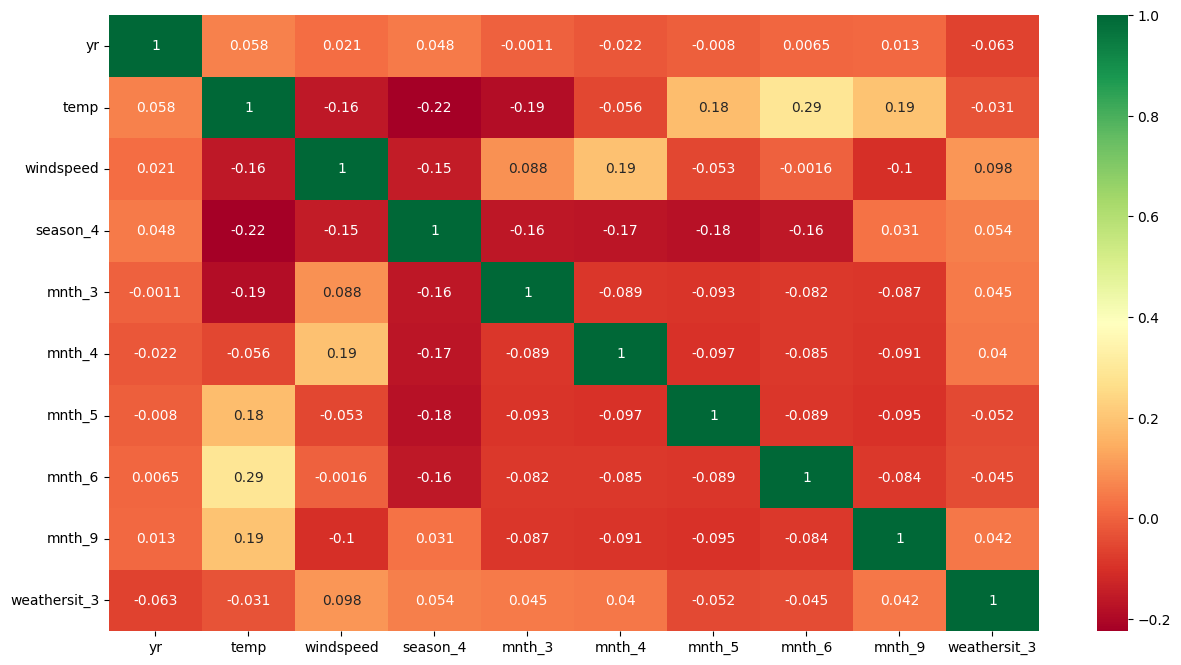

In [1094]:
plt.figure(figsize=(15,8))
sns.heatmap(X_train_new.corr(),annot = True, cmap="RdYlGn")
plt.show()

#### VIF values are less than 5 which is good and also there is no multicolinearity as seen from the heatmap.

## Homoscedasticity

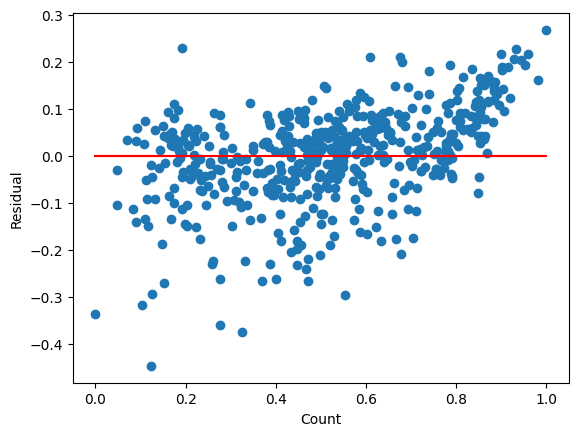

In [1095]:
y_train_pred = lr6.predict(X_train_lm6)
residual = y_train - y_train_pred
plt.scatter(y_train, residual)
plt.plot(y_train,[0]*len(y_train),'r')
plt.xlabel('Count')
plt.ylabel('Residual')
plt.show()

### No visible pattern observed from above plot for residuals.

## Independence of residuals

### Durbin-Watson value of final model lr_6 is 2.035, which signifies there is no autocorrelation.

# MAKING PREDICTION USING FINAL MODEL

### Now that we have fitted the model and checked the assumptions, it's time to go ahead and make predictions using the final model (lr6)

### Apply scaler() to all numeric variables in test dataset. Note: we will only use scaler.transform, 
### as we want to use the metrics that the model learned from the training data to be applied on the test data. 
### In other words, we want to prevent the information leak from train to test dataset.

In [1096]:
num_vars = ['temp', 'atemp', 'hum', 'windspeed','cnt']

bike_data_test[num_vars] = scaler.transform(bike_data_test[num_vars])

In [1097]:
bike_data_test.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_2,season_3,...,mnth_11,mnth_12,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,weathersit_2,weathersit_3
22,0,0,0,0.046591,0.025950,0.453529,0.462217,0.110907,0,0,...,0,0,0,0,0,0,0,0,0,0
468,1,0,0,0.543115,0.536771,0.522511,0.347424,0.855729,1,0,...,0,0,0,0,0,0,0,1,0,0
553,1,0,0,0.951196,0.933712,0.596104,0.212829,0.534975,0,1,...,0,0,0,0,0,0,0,0,0,0
504,1,0,0,0.699909,0.662746,0.551083,0.478229,0.817648,1,0,...,0,0,0,0,0,0,0,0,0,0
353,0,0,1,0.407087,0.416610,0.618615,0.080770,0.428900,0,0,...,0,1,0,1,0,0,0,0,1,0


In [1098]:
bike_data_test.describe()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_2,season_3,...,mnth_11,mnth_12,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,weathersit_2,weathersit_3
count,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,...,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000
mean,0.493151,0.041096,0.684932,0.551225,0.527528,0.662567,0.346706,0.518889,0.264840,0.246575,...,0.073059,0.105023,0.155251,0.146119,0.118721,0.173516,0.132420,0.127854,0.324201,0.036530
std,0.501098,0.198967,0.465607,0.229463,0.215434,0.143562,0.159553,0.219953,0.442259,0.432005,...,0.260830,0.307285,0.362974,0.354034,0.324202,0.379560,0.339723,0.334692,0.469148,0.188034
min,0.000000,0.000000,0.000000,0.046591,0.025950,0.301299,0.073090,0.055683,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.356479,0.348019,0.553031,0.232689,0.364703,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,1.000000,0.557653,0.549198,0.662338,0.328208,0.525771,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.751309,0.709163,0.762338,0.435708,0.676887,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,0.984424,0.980934,1.010390,0.824380,0.963300,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [1099]:
## Dividing into X_test and y_test
y_test = bike_data_test.pop('cnt')
X_test = bike_data_test
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 219 entries, 22 to 313
Data columns (total 29 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   yr            219 non-null    int64  
 1   holiday       219 non-null    int64  
 2   workingday    219 non-null    int64  
 3   temp          219 non-null    float64
 4   atemp         219 non-null    float64
 5   hum           219 non-null    float64
 6   windspeed     219 non-null    float64
 7   season_2      219 non-null    uint8  
 8   season_3      219 non-null    uint8  
 9   season_4      219 non-null    uint8  
 10  mnth_2        219 non-null    uint8  
 11  mnth_3        219 non-null    uint8  
 12  mnth_4        219 non-null    uint8  
 13  mnth_5        219 non-null    uint8  
 14  mnth_6        219 non-null    uint8  
 15  mnth_7        219 non-null    uint8  
 16  mnth_8        219 non-null    uint8  
 17  mnth_9        219 non-null    uint8  
 18  mnth_10       219 non-null   

In [1100]:
#Selecting the variables that were part of final model.
col1=X_train_new.columns
X_test=X_test[col1]
# Adding constant variable to test dataframe
X_test_lm6 = sm.add_constant(X_test)
X_test_lm6.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 219 entries, 22 to 313
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   const         219 non-null    float64
 1   yr            219 non-null    int64  
 2   temp          219 non-null    float64
 3   windspeed     219 non-null    float64
 4   season_4      219 non-null    uint8  
 5   mnth_3        219 non-null    uint8  
 6   mnth_4        219 non-null    uint8  
 7   mnth_5        219 non-null    uint8  
 8   mnth_6        219 non-null    uint8  
 9   mnth_9        219 non-null    uint8  
 10  weathersit_3  219 non-null    uint8  
dtypes: float64(3), int64(1), uint8(7)
memory usage: 10.1 KB


In [1101]:
# Making predictions using the final model (lr6)

y_pred = lr6.predict(X_test_lm6)

# MODEL EVALUATION¶


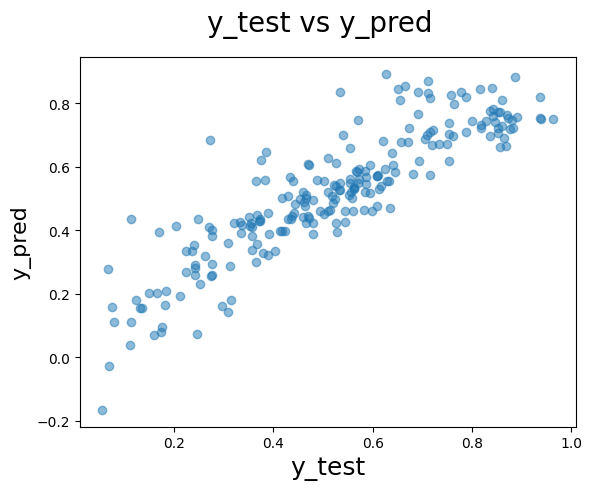

In [1102]:
# Plotting y_test and y_pred to understand the spread

fig = plt.figure()
plt.scatter(y_test, y_pred, alpha=.5)
fig.suptitle('y_test vs y_pred', fontsize = 20)              # Plot heading 
plt.xlabel('y_test', fontsize = 18)                          # X-label
plt.ylabel('y_pred', fontsize = 16) 
plt.show()

#R^2 Value for TEST

In [1103]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)



0.7768676080828206

# Adjusted R^2 Value for TEST

In [1104]:
# We already have the value of R^2 (calculated in above step)

r2=0.7768676080828206

In [1105]:
# Get the shape of X_test
X_test.shape

(219, 10)

In [1106]:
# n is number of rows in X

n = X_test.shape[0]


# Number of features (predictors, p) is the shape along axis 1
p = X_test.shape[1]

# We find the Adjusted R-squared using the formula

adjusted_r2 = 1-(1-r2)*(n-1)/(n-p-1)
adjusted_r2

0.7661400892406486

# Final Result Comparison

### Train R^2 :0.796
### Train Adjusted R^2 :0.792
### Test R^2 :0.776
### Test Adjusted R^2 :0.766
### This seems to be a really good model that can very well 'Generalize' various datasets.

## FINAL REPORT

### As per our final Model, the top 3 predictor variables that influences the bike booking are:

#### Temperature (temp) - A coefficient value of ‘0.5804’ indicated that a unit increase in temp variable increases the bike hire numbers by 0.5804 units.
#### Weather Situation 3 (weathersit_3) - A coefficient value of ‘-0.2768’ indicated that, w.r.t Weathersit1, a unit increase in Weathersit3 variable decreases the bike hire numbers by 0.2768 units.
#### Year (yr) - A coefficient value of ‘0.2318’ indicated that a unit increase in yr variable increases the bike hire numbers by 0.2318 units.

### So, it's suggested to consider these variables of utmost importance while planning, to achieve maximum Booking

### The next best features that can also be considered are

#### season_4: - A coefficient value of ‘0.129183’ indicated that w.r.t season_1, a unit increase in season_4 variable increases the bike hire numbers by 0.129183 units.
#### mnth_9: - A coefficient value of ‘0.090881’ indicated that w.r.t mnth_1, a unit increase in mnth_9 variable increases the bike hire numbers by 0.090881 units.


### Note:

#### weathersit_3 = Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
#### season_4 = Winter
#### mnth_4 and mnth_9 means April and September Respectively
